# Import data

In [48]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
# import data - train.csv here to build our model
data = pd.read_csv('./datasets/train_cleaned.csv')
data_to_pred = pd.read_csv('./datasets/test_cleaned.csv')

In [50]:
data_to_pred.shape

(879, 76)

In [51]:
data_to_pred.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [52]:
data.shape

(2046, 77)

# Data Preprocessing

### Combine training and testing data to clean together

In [53]:
# # remove two-columns: "saleprice"
# data = data.loc[:, ~data.columns.isin(['log_saleprice','saleprice'])]
# add one column to note which dataset does the row belong to: training or testing?
# data['dy'] = 'training'
# data_to_pred['dy'] = 'testing'

In [54]:
# combine two data sets together
combined = pd.concat([data, data_to_pred],sort=False)

In [55]:
# check if combined succesfully --yes
combined.shape

(2925, 77)

# Feature Engineering

### Combine highly related columns

In [56]:
# total number of bath in basement
# total number of bath
combined['bsmt_bath'] = combined['bsmt_full_bath'] + 0.5 * combined['bsmt_half_bath'] 
combined['bath'] = combined['full_bath'] + 0.5 * combined['half_bath']

In [57]:
# basement: 'bsmtfin_sf_1'+'bsmtfin_sf_2'+'bsmt_unf_sf'='total_bsmt_sf'
combined['bsmtfin_sf'] = combined['bsmtfin_sf_1'] + combined['bsmtfin_sf_2']

In [58]:
# property_age: year_sold - year_build
combined['property_age'] = combined['yr_sold'] - combined['year_built']
combined['remod'] = combined['year_remod/add'] - combined['year_built']

In [59]:
# '1st_flr_sf'+'2nd_flr_sf' +'low_qual_fin_sf' = 'gr_liv_area'
combined['high_qual_fin_sf']= combined['1st_flr_sf']+ combined['2nd_flr_sf']

In [60]:
# combined[['totrms_abvgrd','bedroom_abvgr', 'kitchen_abvgr','fireplaces']].head()

In [61]:
# drop above columns
columns_to_drop = ['bsmt_full_bath','bsmt_half_bath','full_bath','half_bath',
                   'bsmtfin_sf_1','bsmtfin_sf_2','total_bsmt_sf',
                   'year_built', 'year_remod/add', 'garage_yr_blt',
                   '1st_flr_sf','2nd_flr_sf','gr_liv_area',
                   ]
combined.drop(columns_to_drop, axis=1,inplace=True)

In [62]:
combined.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_area', 'street', 'alley',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_unf_sf', 'heating',
       'heating_qc', 'central_air', 'low_qual_fin_sf', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc',
       'fence', 'misc_feature', 'misc_val', 'mo_sold', 'yr_sold', '

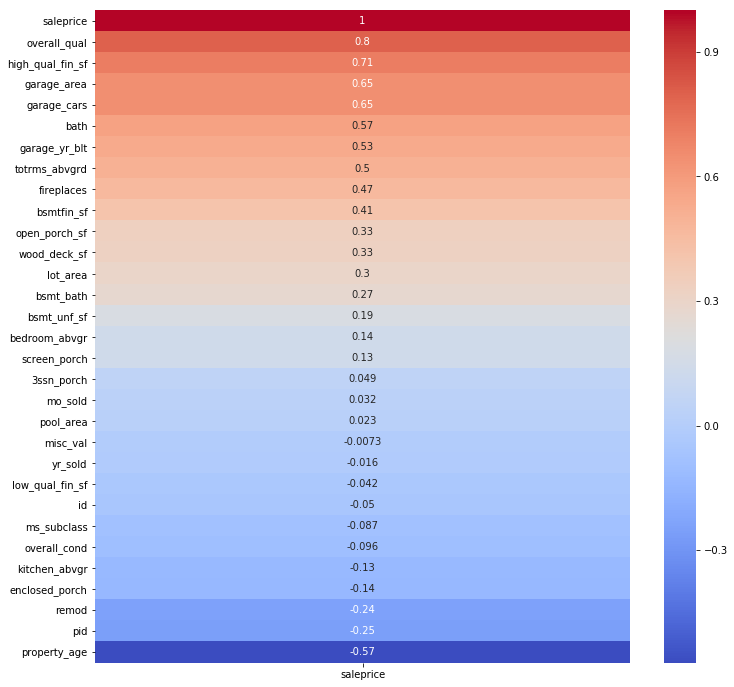

In [63]:
# check correlation of each numeric variables with saleprice
plt.figure(figsize = (12, 12))

sns.heatmap(combined.corr()[['saleprice']].sort_values('saleprice', ascending=False), 
            cmap = 'coolwarm', 
            annot = True)

### Create ranking for ordinal columns

In [15]:
# fillna as 'NA' for some categorical columns with NA in their category
combined['exter_qual'].fillna(value='NA',inplace=True)
combined['exter_cond'].fillna(value='NA',inplace=True)
combined['bsmt_qual'].fillna(value='NA',inplace=True)
combined['bsmt_cond'].fillna(value='NA',inplace=True)
combined['fireplace_qu'].fillna(value='NA',inplace=True)
combined['garage_qual'].fillna(value='NA',inplace=True) 
combined['garage_cond'].fillna(value='NA',inplace=True) 
combined['pool_qc'].fillna(value='NA',inplace=True) 
combined['bsmtfin_type_1'].fillna(value='NA',inplace=True)
combined['bsmtfin_type_2'].fillna(value='NA',inplace=True)
combined['garage_type'].fillna(value='NA',inplace=True)
combined['garage_finish'].fillna(value='NA',inplace=True)
combined['fence'].fillna(value='NA',inplace=True)
combined['bsmt_exposure'].fillna(value='NA',inplace=True)

In [16]:
# transfer some ordinal columns into numbers
# Utilities: which has E,G,W,S combos
utilities_dict = {'ELO': 1,
                  'NoSeWa': 2,
                  'NoSewr': 3,
                  'AllPub': 4}
combined['utilities'] = combined['utilities'].map(utilities_dict)

In [17]:
# transfer some ordinal columns into numbers
# transfer Ex, Gd, TA, Fa, Po, NA as 5,4,3,2,1,0
level_dict_6levels = {'Ex': 5,
                    'Gd': 4,
                    'TA': 3,
                    'Fa': 2,
                    'Po': 1,
                    'NA': 0}
combined['exter_qual'] = combined['exter_qual'].map(level_dict_6levels)
combined['exter_cond'] = combined['exter_cond'].map(level_dict_6levels)
combined['bsmt_qual'] = combined['bsmt_qual'].map(level_dict_6levels)
combined['bsmt_cond'] = combined['bsmt_cond'].map(level_dict_6levels)
combined['fireplace_qu'] = combined['fireplace_qu'].map(level_dict_6levels)
combined['garage_qual'] = combined['garage_qual'].map(level_dict_6levels)
combined['garage_cond'] = combined['garage_cond'].map(level_dict_6levels)

In [18]:
level_dict_5levels = {'Ex': 5,
                    'Gd': 4,
                    'TA': 3,
                    'Fa': 2,
                    'Po': 1}
combined['heating_qc'] = combined['heating_qc'].map(level_dict_5levels)
combined['kitchen_qual'] = combined['kitchen_qual'].map(level_dict_5levels)

In [19]:
# transfer some ordinal columns into numbers
# transfer Ex, Gd, TA, Fa, Po, NA as 5,4,3,2,1,0
level_dict_4levels = {'Ex': 4,
                    'Gd': 3,
                    'TA': 2,
                    'Fa': 1,
                    'NA': 0}
combined['pool_qc'] = combined['pool_qc'].map(level_dict_4levels)

In [20]:
# transfer some ordinal columns into numbers
# transfer Ex, Gd, TA, Fa, Po, NA as 5,4,3,2,1,0
level_dict_na_glq = {'GLQ' : 6,
                    'ALQ' : 5,
                    'BLQ' : 4,
                    'Rec' : 3,
                    'LwQ' : 2,
                    'Unf' : 1,
                    'NA' : 0 }
combined['bsmtfin_type_1'] = combined['bsmtfin_type_1'].map(level_dict_na_glq)
combined['bsmtfin_type_2'] = combined['bsmtfin_type_2'].map(level_dict_na_glq)

In [21]:
# transfer Gd, Av, Mn, No, NA as 4,3,2,1,0
combined['bsmt_exposure'] = combined['bsmt_exposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'NA': 0})


In [22]:
# transfer some ordinal columns into numbers
# N, Y as 0, 1
combined['central_air'] = combined['central_air'].map({'N': 0,'Y': 1})
combined['paved_drive'] = combined['paved_drive'].map({'Y': 3,'P': 2,'N': 1})

In [23]:
# transfer some ordinal columns into numbers
combined['functional'] = combined['functional'].map({'Typ': 1,'Min1': 2,
                                                     'Min2': 3, 'Mod': 4,
                                                    'Maj1': 5, 'Maj2': 6,
                                                    'Sev': 7, 'Sal': 8})

combined['garage_type'] = combined['garage_type'].map({'2Types': 7,'Attchd': 6,
                                                     'Basment': 5, 'BuiltIn': 4,
                                                    'CarPort': 3, 'Detchd': 2,
                                                    'NA': 1})

combined['garage_finish'] = combined['garage_finish'].map({'Fin': 4,'RFn': 3,
                                                     'Unf': 2, 'NA': 1})

combined['fence'] = combined['fence'].map({'GdPrv': 4,'MnPrv': 3,'GdWo':2,
                                                     'MnWw':1, 'NA': 0})

### Create dummy variables for categorical columns

(always remember to create N-1 dummy variables)

In [24]:
categorical_columns = ['ms_subclass',
                       'ms_zoning',
                       'street',
                       'alley', #NA
                       'land_contour',
                       'lot_config',
                       'land_slope',
                       'neighborhood',
                       'condition_1',
                       'condition_2',
                       'bldg_type',
                       'house_style',
                       'roof_style',
                       'roof_matl',
                       'exterior_1st',
                       'exterior_2nd',
                       'foundation',
                       'heating',
                       'misc_feature', #NA
                       'sale_type',
                       'lot_shape']

In [25]:
# find the category with the least records in training set
# If this categorical column has NA, just create dummy variables
# If no NA, to create N-1 dummy variables, I'll drop below columns with the least records
dummy_columns_to_drop = []
for i in categorical_columns:
    if i in ['alley','misc_feature']:
        continue
    else:
        dummy_columns_to_drop.append(i + "_" + str(data[i].value_counts().idxmin()))
print(dummy_columns_to_drop)       

['ms_subclass_150', 'ms_zoning_I (all)', 'street_Grvl', 'land_contour_Low', 'lot_config_FR3', 'land_slope_Sev', 'neighborhood_Landmrk', 'condition_1_RRNe', 'condition_2_RRAn', 'bldg_type_2fmCon', 'house_style_2.5Fin', 'roof_style_Shed', 'roof_matl_Membran', 'exterior_1st_AsphShn', 'exterior_2nd_CBlock', 'foundation_Wood', 'heating_OthW', 'sale_type_Con', 'lot_shape_IR3']


In [26]:
# create a function to create dummy variables
combined_new = pd.get_dummies(combined, columns=categorical_columns)

In [27]:
# drop above picked columns
combined_new.drop(dummy_columns_to_drop, axis=1, inplace=True)

In [28]:
combined_new.shape

(2925, 205)

### Scale Data

In [29]:
X = combined_new.loc[:, ~combined_new.columns.isin(['id','pid','saleprice'])]

In [30]:
ss = StandardScaler()
ss.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
# get the scaled data
X_scaled = ss.transform(X)

In [32]:
# pass the list of columns and transfer scaled data (array) as a dataframe
list_columns = combined_new.columns[~combined_new.columns.isin(['id','pid','saleprice'])]
df = pd.DataFrame(data=X_scaled, columns=list_columns)

In [33]:
# put dropped columns back to the dataset based on index
df['id'] = combined_new['id'].tolist()
df['saleprice'] = combined_new['saleprice'].tolist()

In [34]:
# Split training and testing data
# training: 0-2045, testing: 2046~2925
train_v2 = df.iloc[0:2046,:]
test_v2 = df.iloc[2046:,:]

In [35]:
test_v2.drop('saleprice',axis=1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
train_v2.shape

(2046, 204)

In [37]:
test_v2.shape

(879, 203)

In [38]:
# store precessed data
%store train_v2
%store test_v2

Stored 'train_v2' (DataFrame)
Stored 'test_v2' (DataFrame)
